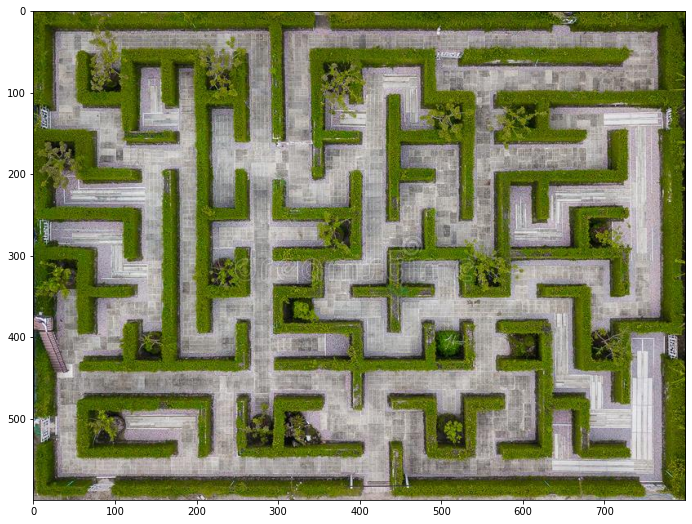

In [1]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (15, 9) # (w, h)

image1 = cv2.imread('images/maze_2.jpg') 
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
source = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(source)

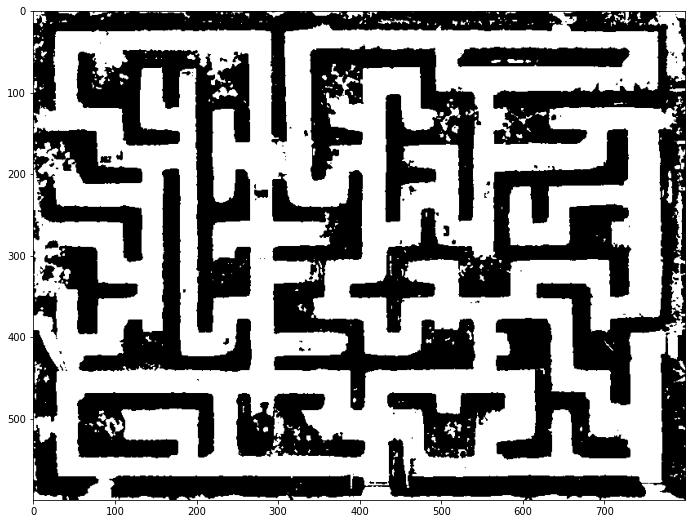

In [2]:
# THRESHOLD IMAGE
blur_img = cv2.GaussianBlur(img, (27,27), 1)
thresh2 = cv2.adaptiveThreshold(blur_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 91, 10)
plt.imshow(thresh2, cmap='gray')

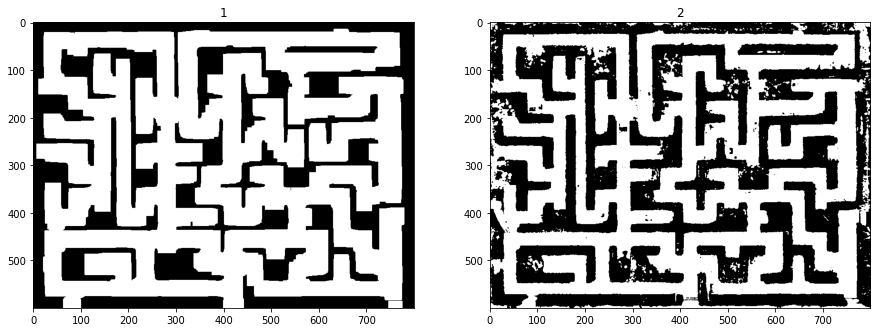

In [3]:
# EROSION AND DILATION

def get_kernel(kernel_size):
    return np.ones((kernel_size,kernel_size), np.uint8)

img_erosion = cv2.erode(thresh2, get_kernel(19), iterations=1)
img_dilation = cv2.dilate(img_erosion, get_kernel(29), iterations=1)
#plt.imshow(img_dilation, cmap='gray')

subplot = plt.subplot(1, 2, 1)
subplot.set_title("1")
subplot.imshow(img_dilation, cmap='gray')
subplot = plt.subplot(1, 2, 2)
subplot.set_title("2")
subplot.imshow(thresh2, cmap='gray')


In [4]:
image_maze_gray = img_dilation
image_maze_rgb = cv2.cvtColor(image_maze_gray, cv2.COLOR_GRAY2RGB)
'''
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)
thickness = 10
start = (50, 550)
finish = (55, 560)
cv2.circle(image_maze_rgb, start, radius=thickness, color=green, thickness=-1)
cv2.circle(image_maze_rgb, finish, radius=thickness, color=blue, thickness=-1)
plt.imshow(image_maze_rgb)
'''

'\nred = (255, 0, 0)\ngreen = (0, 255, 0)\nblue = (0, 0, 255)\nthickness = 10\nstart = (50, 550)\nfinish = (55, 560)\ncv2.circle(image_maze_rgb, start, radius=thickness, color=green, thickness=-1)\ncv2.circle(image_maze_rgb, finish, radius=thickness, color=blue, thickness=-1)\nplt.imshow(image_maze_rgb)\n'

In [5]:
np.unique(image_maze_gray)

array([  0, 255], dtype=uint8)

In [6]:
import cv2
import time

import numpy as np

from algorithms import BFS, DFS, Tremaux, Deadend
from plotting import imshow

DEBUG = False

In [11]:
start = 40, 180
finish = 45, 190

bfs = BFS(image_maze_gray, start=start, finish=finish)
bfs.solve(debug=DEBUG)
imshow(bfs.draw(image_maze_rgb, thickness=10))

KeyboardInterrupt: 